<a href="https://colab.research.google.com/github/pradhanpranati64-hue/demo-repo/blob/main/coursework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/WHR20245CS037_a1bfcb8e-f3d5-49cf-9072-5f0f6923bbef_264243_.csv')
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [ ]:
df.shape

(143, 9)

In [ ]:
df.dtypes

,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


In [ ]:
mean_score   = df['score'].mean()
median_score = df['score'].median()
std_score    = df['score'].std()

print("Mean:", mean_score)
print("Median:", median_score)
print("Std dev:", std_score)

max_country = df.loc[df['score'].idxmax(), 'Country name']
min_country = df.loc[df['score'].idxmin(), 'Country name']

print("Highest score country:", max_country)
print("Lowest score country:", min_country)


Mean: 5.52758041958042
Median: 5.785
Std dev: 1.1707165099442995
Highest score country: Finland
Lowest score country: Afghanistan


In [ ]:
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [ ]:
high_score_countries = df[df['score'] > 7.5]

print("Number of countries with score > 7.5:", len(high_score_countries))
print(high_score_countries[['Country name', 'score']].head(10))


Number of countries with score > 7.5: 3
  Country name  score
0      Finland  7.741
1      Denmark  7.583
2      Iceland  7.525


In [ ]:
top10_gdp_high_score = high_score_countries.sort_values(
    'Log GDP per capita', ascending=False
).head(10)

print("Top 10 high-score countries by Log GDP per capita:")
print(top10_gdp_high_score[['Country name', 'score', 'Log GDP per capita']])


Top 10 high-score countries by Log GDP per capita:
  Country name  score  Log GDP per capita
1      Denmark  7.583               1.908
2      Iceland  7.525               1.881
0      Finland  7.741               1.844


In [ ]:
def happiness_category(score):
    if score < 4:
        return 'Low'
    elif score < 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness Category'] = df['score'].apply(happiness_category)

print("Happiness Category counts:")
print(df['Happiness Category'].value_counts())


Happiness Category counts:
Happiness Category
Medium    70
High      56
Low       17
Name: count, dtype: int64


/tmp/ipython-input-2715296261.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_happiest, x='score', y='Country name', palette='viridis')


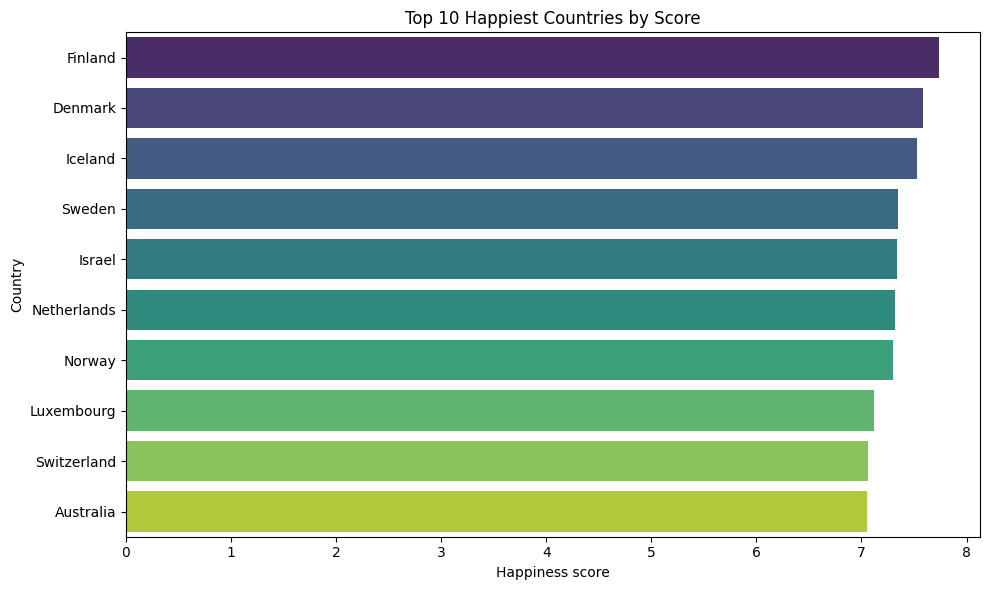

In [ ]:
top10_happiest = df.nlargest(10, 'score')[['Country name', 'score']]

plt.figure(figsize=(10,6))
sns.barplot(data=top10_happiest, x='score', y='Country name', palette='viridis')
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Happiness score')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


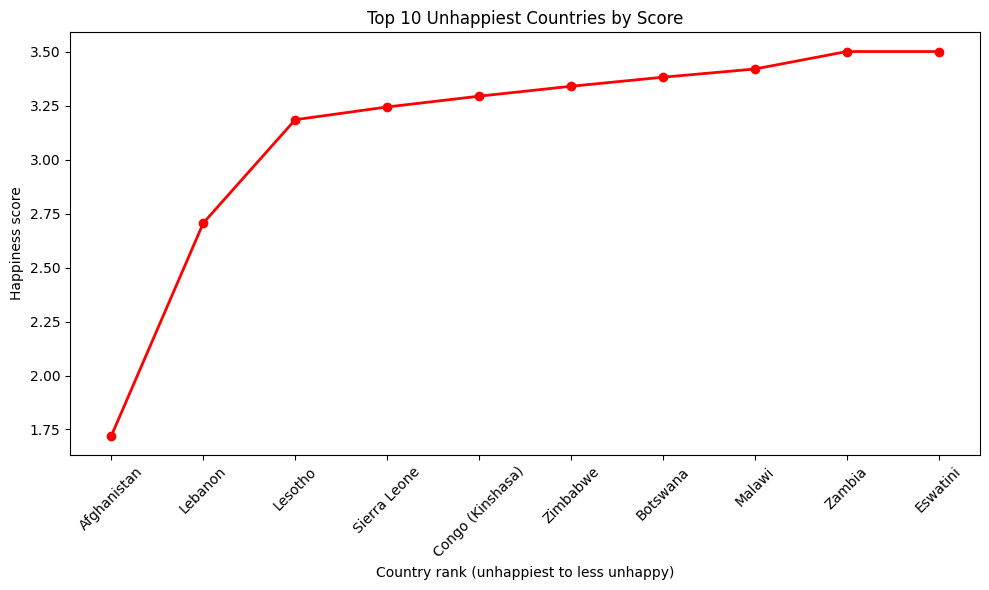

In [ ]:
top10_unhappiest = df.nsmallest(10, 'score')[['Country name', 'score']]

plt.figure(figsize=(10,6))
plt.plot(range(10), top10_unhappiest['score'], marker='o', linewidth=2, color='red')
plt.xticks(range(10), top10_unhappiest['Country name'], rotation=45)
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country rank (unhappiest to less unhappy)')
plt.ylabel('Happiness score')
plt.tight_layout()
plt.show()


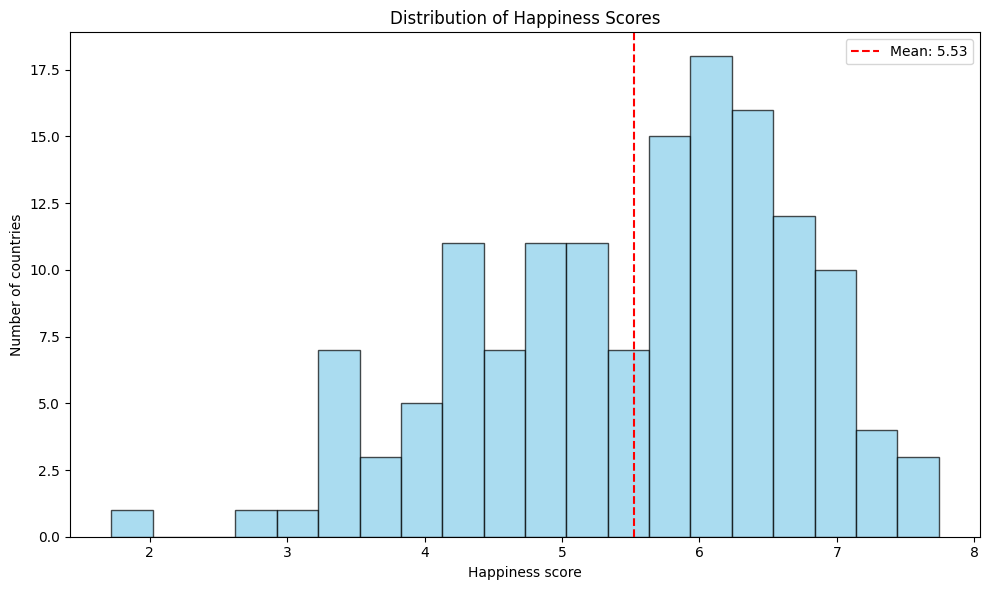

In [ ]:
plt.figure(figsize=(10,6))
plt.hist(df['score'], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness score')
plt.ylabel('Number of countries')
plt.axvline(df['score'].mean(), color='red', linestyle='--', label=f"Mean: {df['score'].mean():.2f}")
plt.legend()
plt.tight_layout()
plt.show()


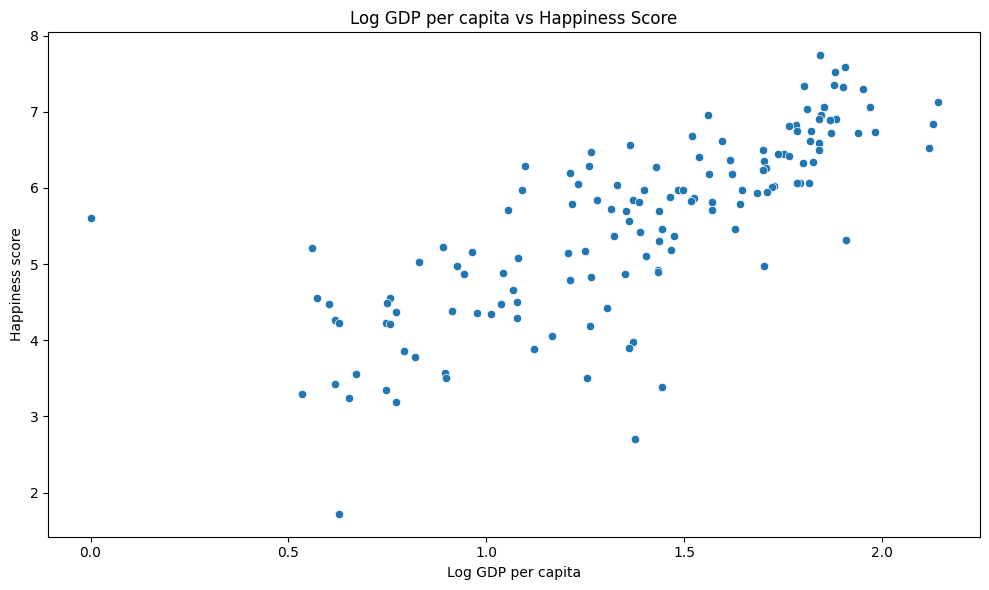

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Log GDP per capita', y='score')
plt.title('Log GDP per capita vs Happiness Score')
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness score')
plt.tight_layout()
plt.show()


In [ ]:
south_asia_countries = [
    'Afghanistan', 'Bangladesh', 'Bhutan', 'India',
    'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka'
]

south_df = df[df['Country name'].isin(south_asia_countries)].copy()

print("South Asia dataframe shape:", south_df.shape)
print(south_df[['Country name', 'score']])


South Asia dataframe shape: (6, 10)
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054
127    Sri Lanka  3.898
128   Bangladesh  3.886
142  Afghanistan  1.721


In [ ]:
south_df.to_csv('south_asia_happiness.csv', index=False)
print("Saved as south_asia_happiness.csv")


Saved as south_asia_happiness.csv


In [ ]:
south_df['Composite Score'] = (
    0.40 * south_df['Log GDP per capita'] +
    0.30 * south_df['Social support'] +
    0.30 * south_df['Healthy life expectancy']
)

composite_rank = south_df.sort_values('Composite Score', ascending=False)[
    ['Country name', 'score', 'Composite Score']
]

print("Composite Score ranking (South Asia):")
print(composite_rank.round(3))


Composite Score ranking (South Asia):
    Country name  score  Composite Score
127    Sri Lanka  3.898            1.074
92         Nepal  5.158            0.816
125        India  4.054            0.787
107     Pakistan  4.657            0.704
128   Bangladesh  3.886            0.677
142  Afghanistan  1.721            0.324


/tmp/ipython-input-915308040.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_composite, x='Composite Score', y='Country name', palette='coolwarm')


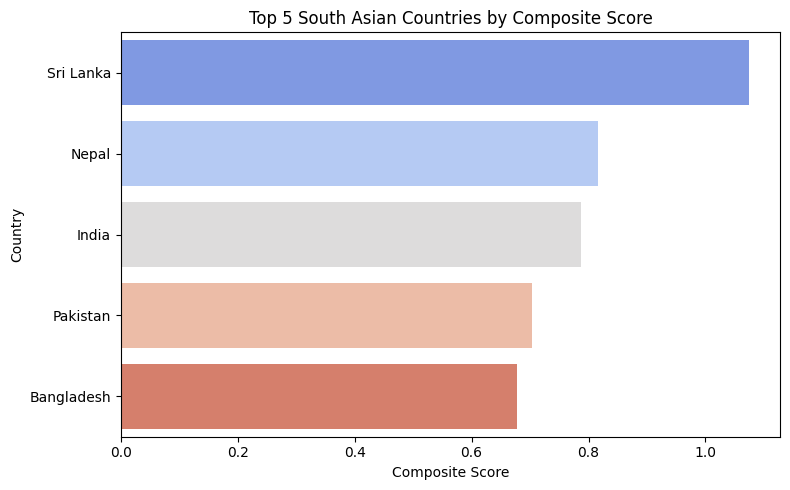

In [ ]:
top5_composite = composite_rank.head(5)

plt.figure(figsize=(8,5))
sns.barplot(data=top5_composite, x='Composite Score', y='Country name', palette='coolwarm')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


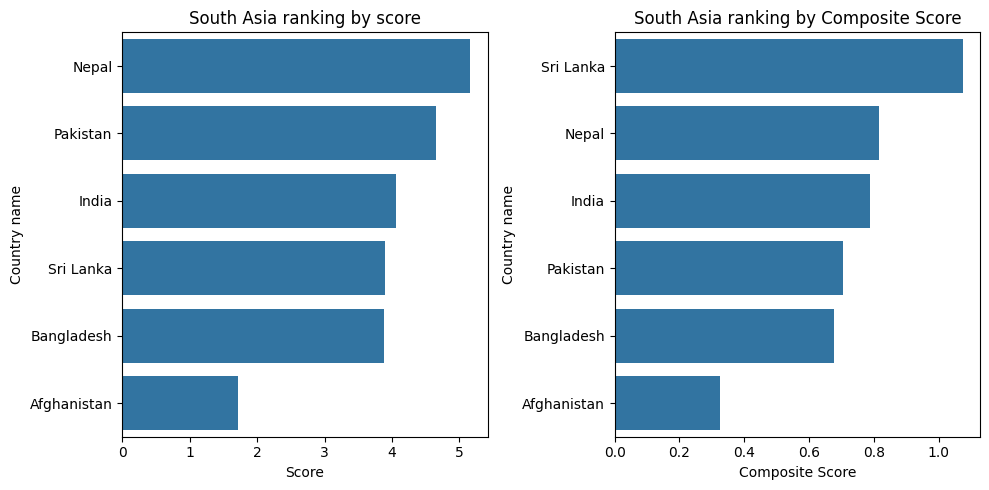

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
sns.barplot(
    data=south_df.sort_values('score', ascending=False),
    x='score', y='Country name'
)
plt.title('South Asia ranking by score')
plt.xlabel('Score')

plt.subplot(1, 2, 2)
sns.barplot(
    data=south_df.sort_values('Composite Score', ascending=False),
    x='Composite Score', y='Country name'
)
plt.title('South Asia ranking by Composite Score')
plt.xlabel('Composite Score')

plt.tight_layout()
plt.show()


In [ ]:
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)]


In [ ]:
score_outliers_sa = find_outliers_iqr(south_df, 'score')
gdp_outliers_sa   = find_outliers_iqr(south_df, 'Log GDP per capita')

print("Score outliers in South Asia:")
print(score_outliers_sa[['Country name', 'score']])

print("\nGDP outliers in South Asia:")
print(gdp_outliers_sa[['Country name', 'Log GDP per capita']])


Score outliers in South Asia:
    Country name  score
142  Afghanistan  1.721

GDP outliers in South Asia:
    Country name  Log GDP per capita
142  Afghanistan               0.628


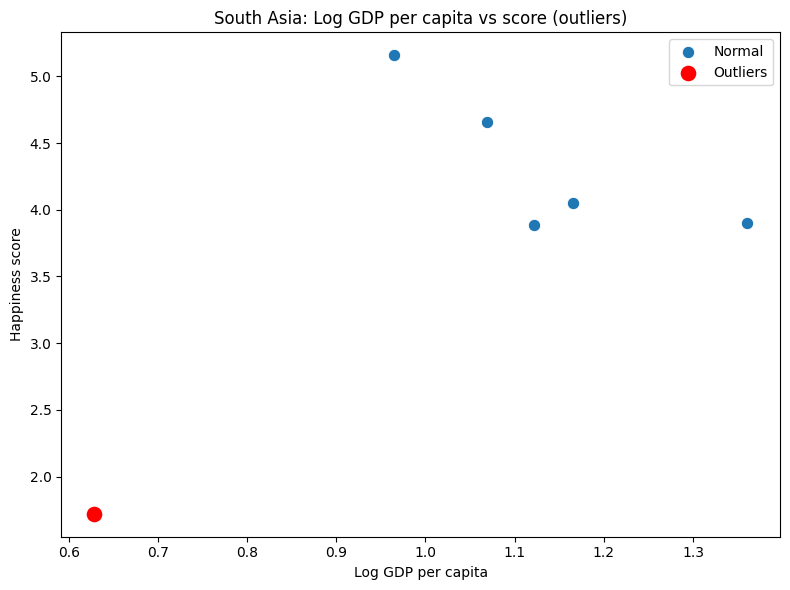

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=south_df, x='Log GDP per capita', y='score',
    label='Normal', s=80
)

if not score_outliers_sa.empty:
    sns.scatterplot(
        data=score_outliers_sa, x='Log GDP per capita', y='score',
        color='red', s=150, label='Outliers'
    )

plt.title('South Asia: Log GDP per capita vs score (outliers)')
plt.xlabel('Log GDP per capita')
plt.ylabel('Happiness score')
plt.legend()
plt.tight_layout()
plt.show()


Correlation between score and Freedom to make life choices: 0.801


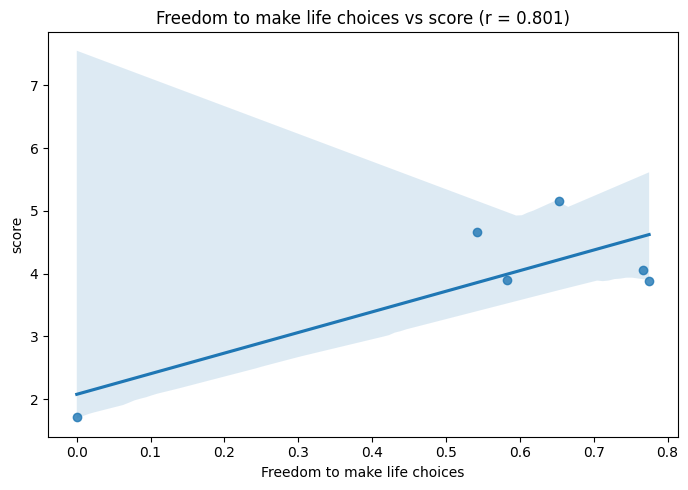

Correlation between score and Generosity: 0.875


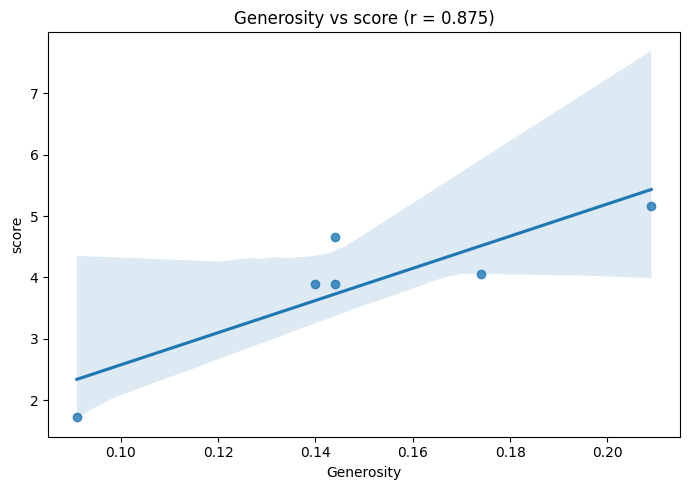

In [ ]:
metrics = ['Freedom to make life choices', 'Generosity']

for m in metrics:
    corr_value = south_df['score'].corr(south_df[m])
    print(f"Correlation between score and {m}: {corr_value:.3f}")

    plt.figure(figsize=(7,5))
    sns.regplot(data=south_df, x=m, y='score')
    plt.title(f'{m} vs score (r = {corr_value:.3f})')
    plt.tight_layout()
    plt.show()


In [ ]:
south_df['GDP_Score_Gap'] = south_df['Log GDP per capita'] - south_df['score']

gap_sorted = south_df.sort_values('GDP_Score_Gap')
print("South Asia – GDP_Score_Gap (ascending):")
print(gap_sorted[['Country name', 'GDP_Score_Gap']].round(3))


South Asia – GDP_Score_Gap (ascending):
    Country name  GDP_Score_Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888
128   Bangladesh         -2.764
127    Sri Lanka         -2.537
142  Afghanistan         -1.093


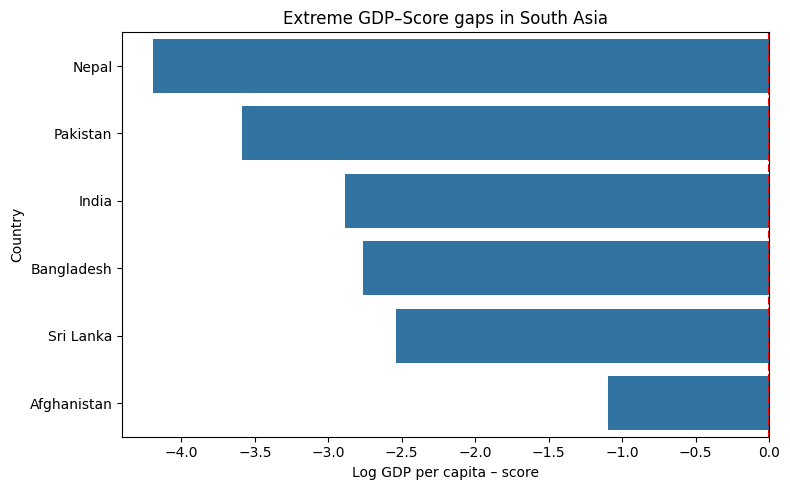

In [ ]:
bottom3_gap = gap_sorted.head(3)      # most negative gaps
top3_gap    = gap_sorted.tail(3)      # most positive gaps

extreme_gaps = pd.concat([bottom3_gap, top3_gap])

plt.figure(figsize=(8,5))
sns.barplot(data=extreme_gaps, x='GDP_Score_Gap', y='Country name')
plt.axvline(0, color='red', linestyle='--')
plt.title('Extreme GDP–Score gaps in South Asia')
plt.xlabel('Log GDP per capita – score')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


In [ ]:
middle_east_countries = [
    'Bahrain', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait',
    'Lebanon', 'Oman', 'Palestine', 'Qatar',
    'Saudi Arabia', 'Syria', 'United Arab Emirates', 'Yemen'
]

middle_df = df[df['Country name'].isin(middle_east_countries)].copy()

print("Middle East dataframe shape:", middle_df.shape)
print(middle_df[['Country name', 'score']])


Middle East dataframe shape: (10, 10)
             Country name  score
4                  Israel  7.341
12                 Kuwait  6.951
21   United Arab Emirates  6.733
27           Saudi Arabia  6.594
61                Bahrain  5.959
91                   Iraq  5.166
99                   Iran  4.923
124                Jordan  4.186
132                 Yemen  3.561
141               Lebanon  2.707


In [ ]:
middle_df.to_csv('middle_east_happiness.csv', index=False)
print("Saved as middle_east_happiness.csv")


Saved as middle_east_happiness.csv


In [ ]:
sa_mean = south_df['score'].mean()
sa_std  = south_df['score'].std()
me_mean = middle_df['score'].mean()
me_std  = middle_df['score'].std()

print(f"South Asia – mean score: {sa_mean:.3f}, std: {sa_std:.3f}")
print(f"Middle East – mean score: {me_mean:.3f}, std: {me_std:.3f}")

if sa_mean > me_mean:
    print("South Asia has higher average happiness.")
else:
    print("Middle East has higher average happiness.")


South Asia – mean score: 3.896, std: 1.177
Middle East – mean score: 5.412, std: 1.566
Middle East has higher average happiness.


In [ ]:
def top_bottom(df_region, n=3):
    top = df_region.nlargest(n, 'score')[['Country name', 'score']].assign(Group='Top')
    bottom = df_region.nsmallest(n, 'score')[['Country name', 'score']].assign(Group='Bottom')
    return pd.concat([top, bottom])

sa_tb = top_bottom(south_df)
me_tb = top_bottom(middle_df)

print("South Asia – Top & Bottom 3:")
print(sa_tb)

print("\nMiddle East – Top & Bottom 3:")
print(me_tb)


South Asia – Top & Bottom 3:
    Country name  score   Group
92         Nepal  5.158     Top
107     Pakistan  4.657     Top
125        India  4.054     Top
142  Afghanistan  1.721  Bottom
128   Bangladesh  3.886  Bottom
127    Sri Lanka  3.898  Bottom

Middle East – Top & Bottom 3:
             Country name  score   Group
4                  Israel  7.341     Top
12                 Kuwait  6.951     Top
21   United Arab Emirates  6.733     Top
141               Lebanon  2.707  Bottom
132                 Yemen  3.561  Bottom
124                Jordan  4.186  Bottom


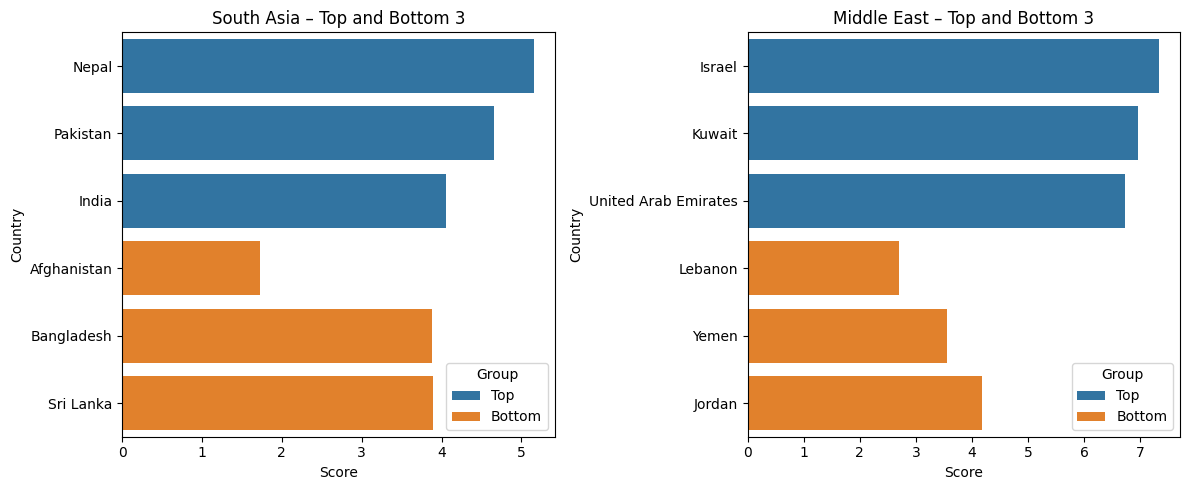

In [ ]:
plt.figure(figsize=(12,5))

# South Asia
plt.subplot(1,2,1)
sns.barplot(data=sa_tb, x='score', y='Country name', hue='Group')
plt.title('South Asia – Top and Bottom 3')
plt.xlabel('Score')
plt.ylabel('Country')

# Middle East
plt.subplot(1,2,2)
sns.barplot(data=me_tb, x='score', y='Country name', hue='Group')
plt.title('Middle East – Top and Bottom 3')
plt.xlabel('Score')
plt.ylabel('Country')

plt.tight_layout()
plt.show()


In [ ]:
metrics_compare = pd.DataFrame({
    'South Asia': [
        south_df['Log GDP per capita'].mean(),
        south_df['Social support'].mean(),
        south_df['Healthy life expectancy'].mean()
    ],
    'Middle East': [
        middle_df['Log GDP per capita'].mean(),
        middle_df['Social support'].mean(),
        middle_df['Healthy life expectancy'].mean()
    ]
}, index=['Log GDP per capita', 'Social support', 'Healthy life expectancy'])

print("Metric means by region:")
print(metrics_compare.round(3))


Metric means by region:
                         South Asia  Middle East
Log GDP per capita            1.052        1.496
Social support                0.612        1.153
Healthy life expectancy       0.420        0.554


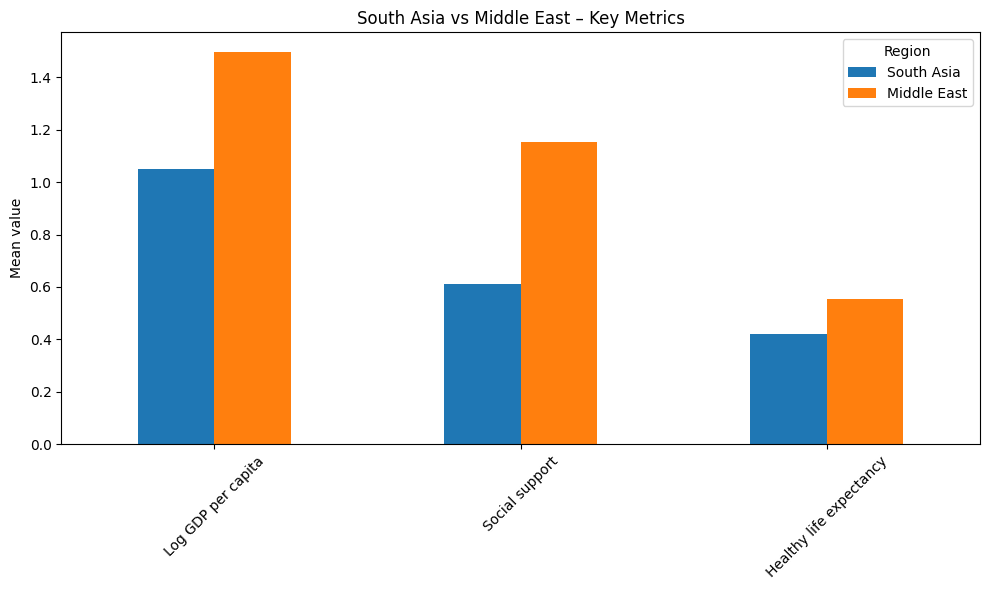

In [ ]:
metrics_compare.plot(kind='bar', figsize=(10,6))
plt.title('South Asia vs Middle East – Key Metrics')
plt.ylabel('Mean value')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()


In [ ]:
sa_range = south_df['score'].max() - south_df['score'].min()
me_range = middle_df['score'].max() - middle_df['score'].min()

sa_cv = south_df['score'].std() / south_df['score'].mean()
me_cv = middle_df['score'].std() / middle_df['score'].mean()

print(f"South Asia – range: {sa_range:.3f}, CV: {sa_cv:.3f}")
print(f"Middle East – range: {me_range:.3f}, CV: {me_cv:.3f}")


South Asia – range: 3.437, CV: 0.302
Middle East – range: 4.634, CV: 0.289


In [ ]:
sa_out_score = find_outliers_iqr(south_df, 'score')
me_out_score = find_outliers_iqr(middle_df, 'score')

sa_out_gdp = find_outliers_iqr(south_df, 'Log GDP per capita')
me_out_gdp = find_outliers_iqr(middle_df, 'Log GDP per capita')

print("South Asia score outliers:")
print(sa_out_score[['Country name', 'score']])

print("\nMiddle East score outliers:")
print(me_out_score[['Country name', 'score']])


South Asia score outliers:
    Country name  score
142  Afghanistan  1.721

Middle East score outliers:
Empty DataFrame
Columns: [Country name, score]
Index: []


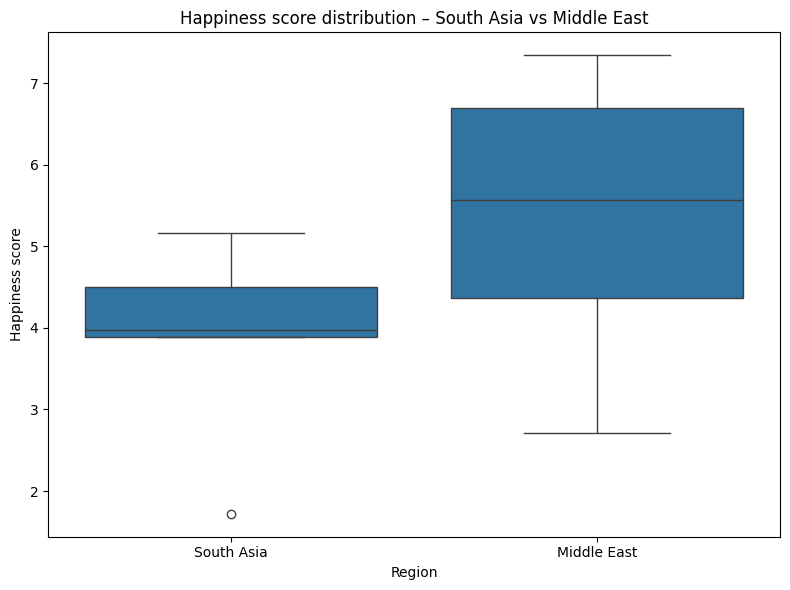

In [ ]:
combined_scores = pd.concat([
    south_df[['score']].assign(Region='South Asia'),
    middle_df[['score']].assign(Region='Middle East')
])

plt.figure(figsize=(8,6))
sns.boxplot(data=combined_scores, x='Region', y='score')
plt.title('Happiness score distribution – South Asia vs Middle East')
plt.ylabel('Happiness score')
plt.tight_layout()
plt.show()
